In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv("/Users/ivyadiele/Downloads/customer_shopping_data.csv")

In [7]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [11]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [24]:
df = df.drop_duplicates()

In [92]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df.drop('invoice_no', axis = 1)

,customer_id,gender,age,category,quantity,price,invoice_date,Cluster,payment_method_Credit Card,payment_method_Debit Card,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center
0,C241288,NaN,28,Clothing,5,1500.40,5/8/2022,3,True,False,False,False,False,True,False,False,False,False,False
1,C111565,NaN,21,Shoes,3,1800.51,12/12/2021,3,False,True,False,True,False,False,False,False,False,False,False
2,C266599,NaN,20,Clothing,1,300.08,9/11/2021,2,False,False,False,False,False,False,False,True,False,False,False
3,C988172,NaN,66,Shoes,5,3000.85,16/05/2021,0,True,False,False,False,False,False,False,False,True,False,False
4,C189076,NaN,53,Books,4,60.60,24/10/2021,1,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,C441542,NaN,45,Souvenir,5,58.65,21/09/2022,1,True,False,False,False,False,True,False,False,False,False,False
99453,C569580,NaN,27,Food & Beverage,2,10.46,22/09/2021,2,False,False,False,True,False,False,False,False,False,False,False
99454,C103292,NaN,63,Food & Beverage,2,10.46,28/03/2021,4,False,True,False,False,False,False,False,True,False,False,False
99455,C800631,NaN,56,Technology,4,4200.00,16/03/2021,0,False,False,False,False,True,False,False,False,False,False,False


In [34]:
df=df.dropna()

In [94]:
features = df[['age', 'quantity', 'price'] + list(df.columns[df.columns.str.startswith('payment_method')]) + list(df.columns[df.columns.str.startswith('shopping_mall')])]

In [98]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

In [100]:
wcss = []

In [102]:
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

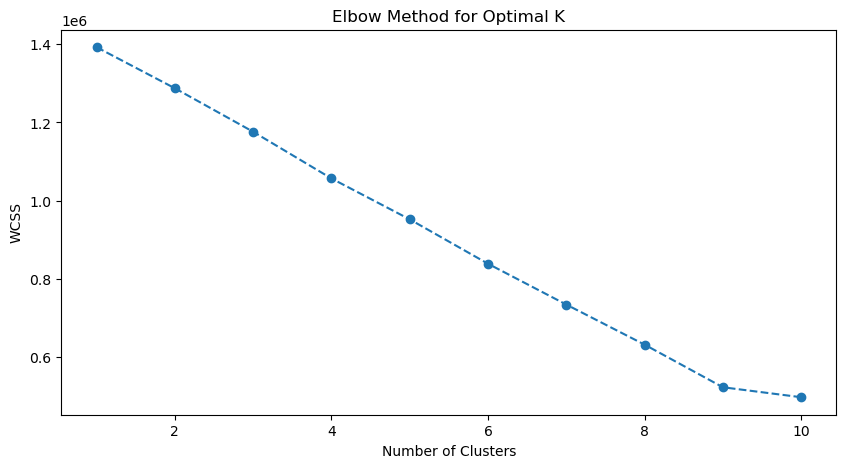

In [134]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [136]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(df_scaled)

df['Cluster'] = clusters
print(df['Cluster'].value_counts())

Cluster
2    64398
1    19823
3    10161
0     5075
Name: count, dtype: int64


In [138]:
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns = ['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

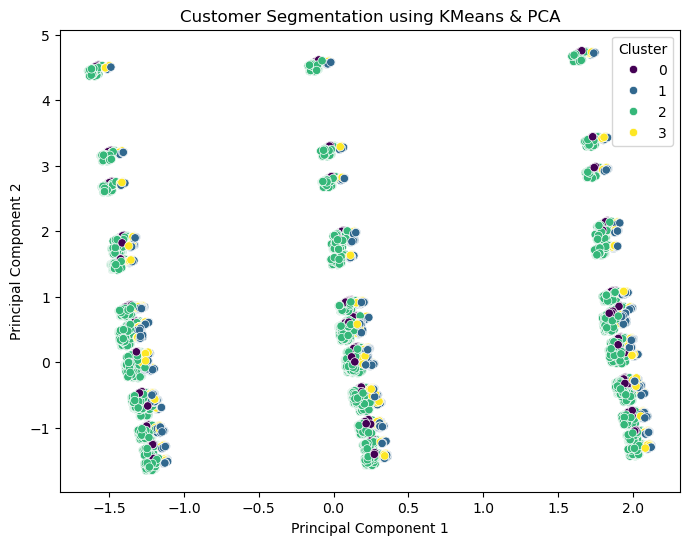

In [140]:
plt.figure(figsize = (8,6))
sns.scatterplot(x= 'PCA1', y= 'PCA2', hue = 'Cluster', data = df_pca, palette = 'viridis')
plt.title('Customer Segmentation using KMeans & PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Cluster')
plt.show()

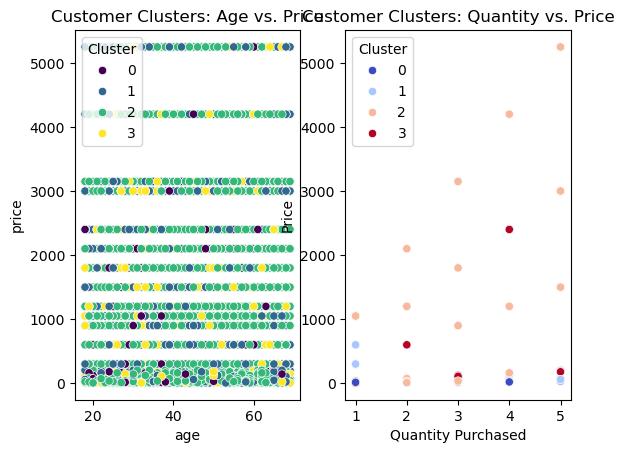

In [142]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['age'], y=df['price'], hue=df['Cluster'], palette='viridis')
plt.xlabel('age')
plt.ylabel('price')
plt.title('Customer Clusters: Age vs. Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['quantity'], y=df['price'], hue=df['Cluster'], palette='coolwarm')
plt.xlabel('Quantity Purchased')
plt.ylabel('Price')
plt.title('Customer Clusters: Quantity vs. Price')

plt.show()